In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential,load_model
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from joblib import dump, load

In [ ]:
!pip install emnist

In [ ]:
from emnist import extract_training_samples, extract_test_samples

In [ ]:
X_train, y_train = extract_training_samples('balanced')
X_test, y_test = extract_test_samples('balanced')

In [ ]:
X_train = pd.DataFrame(X_train.reshape(-1,28*28))
X_test = pd.DataFrame(X_test.reshape(-1,28*28))
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

In [ ]:
# X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=101)

In [ ]:
# Data Normalization [0, 1]
X_train /= 255
# X_val /= 255
X_test /= 255

# one-hot encoding for target column
LB = LabelBinarizer()
y_train = LB.fit_transform(y_train)
# y_val = LB.fit_transform(y_val)
y_test = LB.fit_transform(y_test)

In [ ]:
X_train = np.array(X_train).reshape(-1,28,28,1)
# X_val = np.array(X_val).reshape(-1,28,28,1)
X_test = np.array(X_test).reshape(-1,28,28,1)

y_train = np.array(y_train)
# y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
# Number of objects
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(112800, 28, 28, 1) (18800, 28, 28, 1)
(112800, 47) (18800, 47)


In [ ]:
def callbacks(): 
    return [ 
        EarlyStopping(monitor = 'loss', patience = 6), 
        ReduceLROnPlateau(monitor = 'loss', patience = 3), 
        ModelCheckpoint('best_model.hdf5', save_best_only=True)
    ]

In [ ]:
model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = (28,28,1)),
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same' ),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(47, activation = "softmax")
        
    ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, epochs=100, batch_size=64, validation_data = (X_test, y_test),  verbose=1, callbacks = callbacks())

Epoch 1/100
1763/1763 [==============================] - 40s 22ms/step - loss: 1.1458 - accuracy: 0.6593 - val_loss: 0.4531 - val_accuracy: 0.8475 - lr: 0.0010
Epoch 2/100
1763/1763 [==============================] - 36s 21ms/step - loss: 0.5310 - accuracy: 0.8214 - val_loss: 0.3911 - val_accuracy: 0.8654 - lr: 0.0010
Epoch 3/100
1763/1763 [==============================] - 36s 21ms/step - loss: 0.4576 - accuracy: 0.8449 - val_loss: 0.3603 - val_accuracy: 0.8724 - lr: 0.0010
Epoch 4/100
1763/1763 [==============================] - 36s 20ms/step - loss: 0.4216 - accuracy: 0.8562 - val_loss: 0.3458 - val_accuracy: 0.8788 - lr: 0.0010
Epoch 5/100
1763/1763 [==============================] - 36s 21ms/step - loss: 0.3972 - accuracy: 0.8631 - val_loss: 0.3381 - val_accuracy: 0.8827 - lr: 0.0010
Epoch 6/100
1763/1763 [==============================] - 36s 21ms/step - loss: 0.3761 - accuracy: 0.8700 - val_loss: 0.3221 - val_accuracy: 0.8857 - lr: 0.0010
Epoch 7/100
1763/1763 [=================

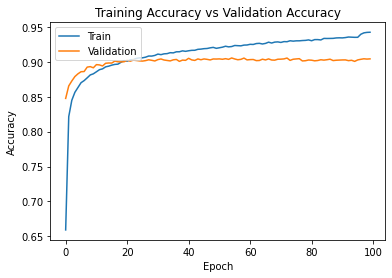

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

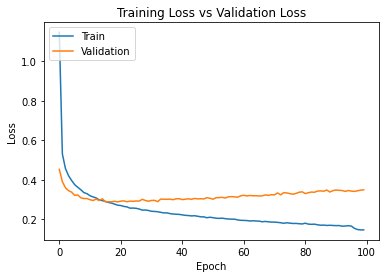

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model = load_model('best_model.hdf5')

In [ ]:
 score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test score:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.28894057869911194
Test score: 0.8999468088150024
CNN Error: 10.01%


In [ ]:
model.save("character_recog_model.hdf5")

In [ ]:
dump(LB,'Label_Binarizer.joblib')

['Label_Binarizer.joblib']

In [ ]:
files.download('character_recog_model.hdf5')
files.download('Label_Binarizer.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>